<a href="https://colab.research.google.com/github/Gcango/Projecto_2/blob/main/Analise_Estado_Saude_COVID19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neste projeto, foi realizada uma análise dos dados relacionados à Covid-19, utilizando informações disponíveis no repositório do Johns Hopkins até o dia 3 de setembro de 2023. Estes dados incluem registros de casos confirmados, recuperados e óbitos. A análise concentrou-se especificamente em entender os dados de Angola, incluido a sua a taxa de letalidade da doença. Para isso, foram examinados os casos confirmados e os casos fatais, a fim de avaliar o impacto da Covid-19. Ao longo do trabalho, diversas outras questões foram abordadas e discutidas no notebook.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#1) - Inserção das Bases de dados Johns Hopkins

In [3]:
dados_geral = pd.read_csv("/content/covid19_conf_global.csv")

In [4]:
dados_geral.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [5]:
dados_mortes = pd.read_csv("/content/covid19_deaths_global.csv")

In [6]:
dados_mortes.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [7]:
dados_recup = pd.read_csv("/content/time_series_covid19_recovered_global.csv")

In [8]:
dados_recup.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#2) - Dados disponiveis para analise

In [10]:
display(dados_geral.head())
display(dados_mortes.head())
display(dados_recup.head())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#3)- Dimenção das BD dos Confirmados

In [12]:
dados_geral.shape
print("Os dados com casos confirmados tem ",dados_geral.shape[0], "Linhas e ", dados_geral.shape[1], "Colunas" )

Os dados com casos confirmados tem  289 Linhas e  1147 Colunas


In [13]:
dados_geral.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1147)

In [14]:
#4) - Definido o Country/Region dos dados_geral como a primeira Coluna e nomeando-o como df1

In [15]:
df1 = dados_geral.drop(['Province/State'], axis=1)

In [16]:
df1.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [17]:
df1['Country/Region'].value_counts()

Country/Region
China             34
Canada            16
United Kingdom    15
France            12
Australia          8
                  ..
Guinea             1
Guinea-Bissau      1
Guyana             1
Haiti              1
Zimbabwe           1
Name: count, Length: 201, dtype: int64

In [18]:
#5) - Verificando os Paises existente e sua quantidades

In [19]:
df1['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

In [20]:
df1['Country/Region'].value_counts().head(20)

Country/Region
China               34
Canada              16
United Kingdom      15
France              12
Australia            8
Netherlands          5
Denmark              3
New Zealand          3
Panama               1
Niger                1
Nigeria              1
North Macedonia      1
Norway               1
Oman                 1
Pakistan             1
Palau                1
Peru                 1
Papua New Guinea     1
Paraguay             1
Philippines          1
Name: count, dtype: int64

In [21]:
print("A Base de Dados desta analise conta com um total de ",df1['Country/Region'].nunique(), "Paises")

A Base de Dados desta analise conta com um total de  201 Paises


In [22]:
#6) - Representação do somatorio por Paises Por Dia

In [23]:
casos_pais = df1.groupby('Country/Region').sum()

In [24]:
casos_pais.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [25]:
#7) - Olhar especificamente para o caso de Angola

In [26]:
casos_pais.loc['Angola'][2:]

1/22/20         0.0
1/23/20         0.0
1/24/20         0.0
1/25/20         0.0
1/26/20         0.0
             ...   
3/5/23     105277.0
3/6/23     105277.0
3/7/23     105277.0
3/8/23     105288.0
3/9/23     105288.0
Name: Angola, Length: 1143, dtype: float64

In [27]:
#8) - Casos Confirmados de Angola

In [28]:
print("No total de acordo com esses dados o somatorio dos casos de Angola são num total ", casos_pais.loc['Angola'][2:].sum() )

No total de acordo com esses dados o somatorio dos casos de Angola são num total  60025203.0


In [29]:
#9) - Projetando a realidade de Angola nesta intervalo de tempo

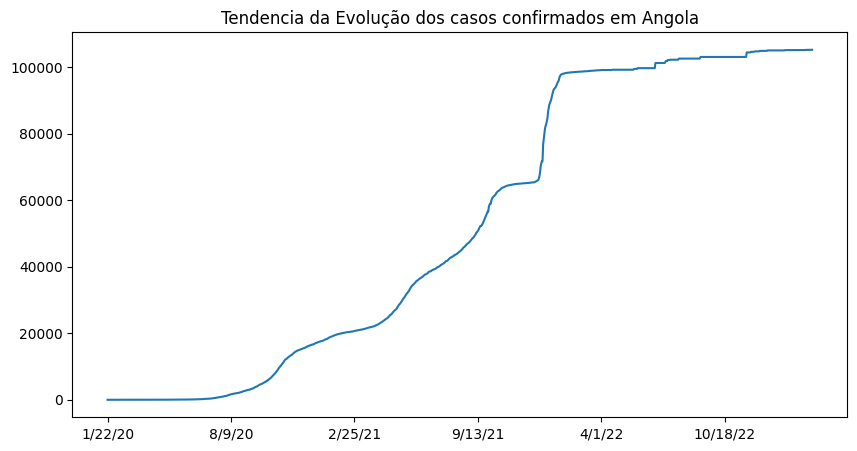

In [30]:
plt.figure(figsize=(10,5))
casos_pais.loc['Angola'][2:].plot()
plt.title("Tendencia da Evolução dos casos confirmados em Angola")
plt.show()

In [31]:
#10)- Diferença entre os casos e sua projecção

In [32]:
casos_pais.loc['Angola'][2:].diff().dropna()

1/23/20     0.0
1/24/20     0.0
1/25/20     0.0
1/26/20     0.0
1/27/20     0.0
           ... 
3/5/23      0.0
3/6/23      0.0
3/7/23      0.0
3/8/23     11.0
3/9/23      0.0
Name: Angola, Length: 1142, dtype: float64

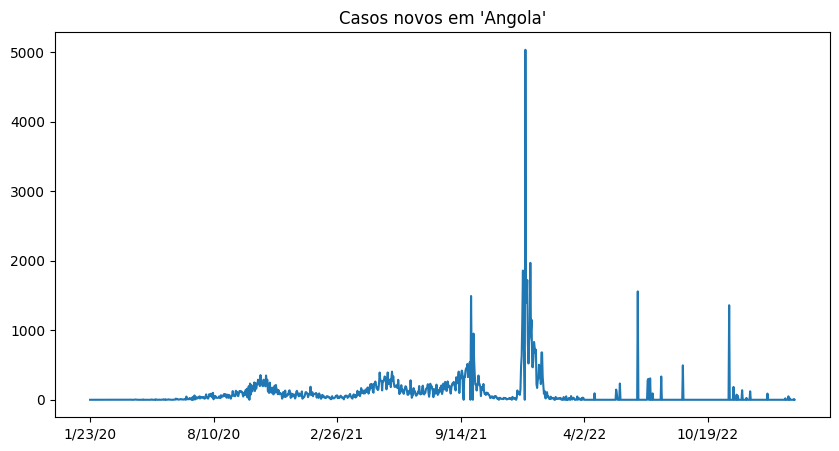

In [33]:
plt.figure(figsize=(10,5))
plt.title("Casos novos em 'Angola'")
novos_casos_Angola = casos_pais.loc['Angola'][2:].diff().dropna()
novos_casos_Angola.plot();

In [34]:
#11) - Analise e projeção por Paises, num dia Específico - Mes-Dia-Ano

In [35]:
ultima_data = "3/9/23"

In [36]:
df1[ultima_data]

0      209451
1      334457
2      271496
3       47890
4      105288
        ...  
284    703228
285       535
286     11945
287    343135
288    264276
Name: 3/9/23, Length: 289, dtype: int64

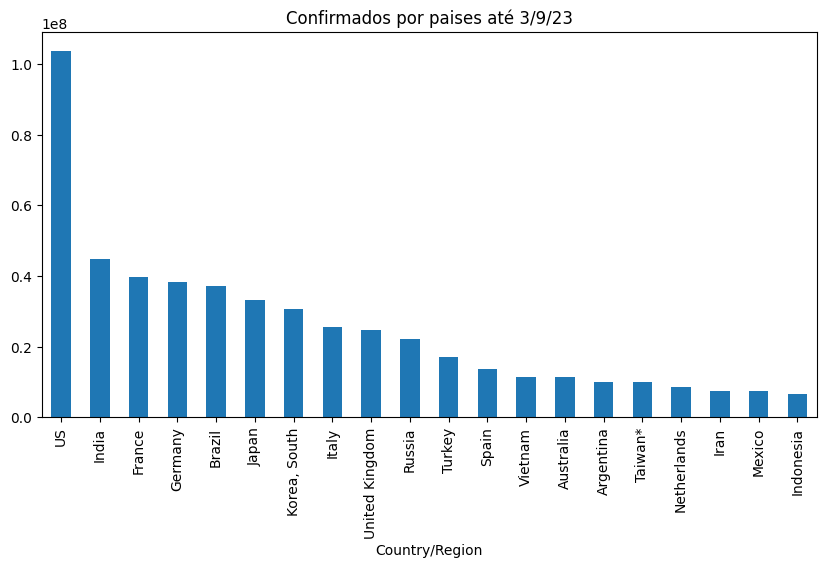

In [37]:
plt.figure(figsize=(10,5))

casos_pais[ultima_data].sort_values(ascending=False)[:20].plot(kind='bar')
plt.title("Confirmados por paises até 3/9/23")
plt.show()

In [38]:
#12) - Impressão dos Gerais da Johns Hopkins

In [39]:
display(dados_geral.head())
display(dados_mortes.head())
display(dados_recup.head())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df2 = dados_mortes.drop(['Province/State'], axis=1)

In [41]:
df2.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [42]:
#13) - Caracterização da BD Recuperados

In [43]:

print("Os dados com casos de Mortes tem ",df2.shape[0], "Linhas e ", df2.shape[1], "Colunas" )

Os dados com casos de Mortes tem  289 Linhas e  1146 Colunas


In [44]:
df3 = dados_recup.drop(['Province/State'], axis=1)

In [45]:
df3.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
#14) - Caracterização da BD Mortes

In [47]:
print("Os dados com casos de Mortes tem ",df3.shape[0], "Linhas e ", df3.shape[1], "Colunas" )

Os dados com casos de Mortes tem  274 Linhas e  1146 Colunas


In [48]:
#15) - Verificar os casos confirmados por paises na data especifica

In [49]:
casos_pais.groupby("Country/Region").sum()[ultima_data].head()

Country/Region
Afghanistan    209451
Albania        334457
Algeria        271496
Andorra         47890
Angola         105288
Name: 3/9/23, dtype: int64

In [50]:
#16) - Verificar os casos Mortes por paises na data especifica

In [51]:
df2.groupby("Country/Region").sum()[ultima_data].head()

Country/Region
Afghanistan    7896
Albania        3598
Algeria        6881
Andorra         165
Angola         1933
Name: 3/9/23, dtype: int64

In [52]:
#17) - Verificar os casos Repuperados por paises na data especifica

In [53]:
df3.groupby("Country/Region").sum()[ultima_data].head()

Country/Region
Afghanistan    0
Albania        0
Algeria        0
Andorra        0
Angola         0
Name: 3/9/23, dtype: int64

In [54]:
#18) - Definição da função para retornar a última data para cada o conjunto de dados

In [55]:
def ultima_data(data):
  return data.groupby("Country/Region").sum().iloc[:,-1]

ultima_data(df1)

Country/Region
Afghanistan             209451
Albania                 334457
Algeria                 271496
Andorra                  47890
Angola                  105288
                         ...  
West Bank and Gaza      703228
Winter Olympics 2022       535
Yemen                    11945
Zambia                  343135
Zimbabwe                264276
Name: 3/9/23, Length: 201, dtype: int64

In [56]:
#19) - Junção dos dados de casos confirmados, mortes e recuperados no dia especifico de analise

In [57]:
infor_geral = [ultima_data(df1), ultima_data(df2), ultima_data(df3)]
combinados =pd.concat(infor_geral, axis=1)
combinados.columns = ['Confirmados','Mortes','Recuperados']
combinados.reset_index().head()

,Country/Region,Confirmados,Mortes,Recuperados
0,Afghanistan,209451,7896,0
1,Albania,334457,3598,0
2,Algeria,271496,6881,0
3,Andorra,47890,165,0
4,Angola,105288,1933,0


In [58]:
#20) - Estimando a Letalidade da doença Geral
#OBS: A letalidade olha nos casos de morte dividir pelos casos confirmados

In [70]:
resumo_geral = combinados.sum()
letalidade_geral = resumo_geral['Mortes'] / resumo_geral['Confirmados']
#letalidade_geral2 = resumo_geral['Mortes'] / (resumo_geral['Mortes'] + resumo_geral['Recuperados'])
print(letalidade_geral * 100)
#print(letalidade_geral2 * 100)

1.017160158510038


In [61]:
#21) - Calucular a letalidade por País

In [62]:
combinados.reset_index().head()

,Country/Region,Confirmados,Mortes,Recuperados
0,Afghanistan,209451,7896,0
1,Albania,334457,3598,0
2,Algeria,271496,6881,0
3,Andorra,47890,165,0
4,Angola,105288,1933,0


In [63]:
letalidade_pais_1 = combinados['Mortes'] / combinados['Confirmados'] * 100
combinados['letalidade_pais_1'] = letalidade_pais_1
combinados.sample(20)

,Confirmados,Mortes,Recuperados,letalidade_pais_1
Country/Region,,,,
Latvia,976255,6269,0,0.642148
Malawi,88707,2686,0,3.027946
Andorra,47890,165,0,0.344540
Zambia,343135,4057,0,1.182333
West Bank and Gaza,703228,5708,0,0.811686
Antarctica,11,0,0,0.000000
Saint Kitts and Nevis,6597,47,0,0.712445
Burundi,53631,38,0,0.070855
Marshall Islands,15649,17,0,0.108633


In [ ]:
#22) - Mostrar a Letalidade específica de Angola e dados simplificados

In [64]:
combinados.loc["Angola"]

Confirmados          105288.000000
Mortes                 1933.000000
Recuperados               0.000000
letalidade_pais_1         1.835917
Name: Angola, dtype: float64

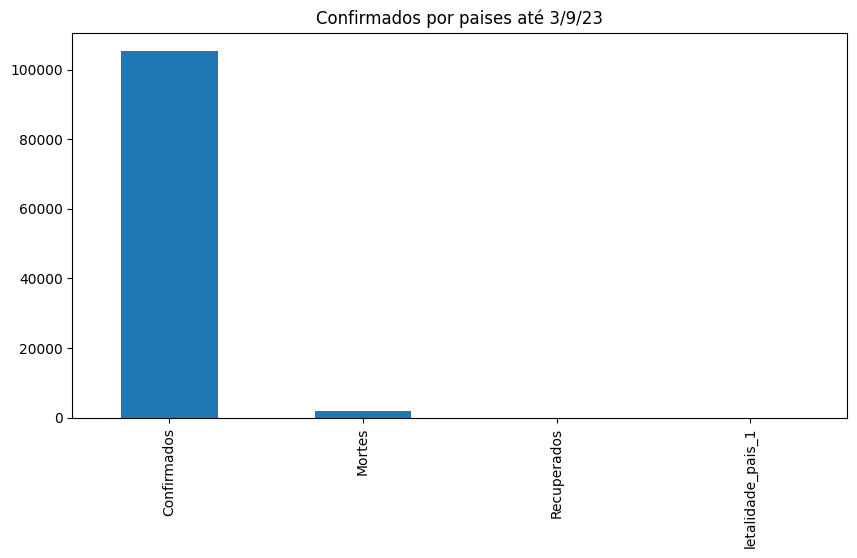

In [72]:
plt.figure(figsize=(10,5))

combinados.loc["Angola"].plot(kind='bar')
plt.title("Confirmados por paises até 3/9/23")
plt.show()

In [ ]:
#22) - Organizar os daos pelo valor da Letalidadedados simplificados

In [65]:
combinados.sort_values("letalidade_pais_1", ascending=False).head(20)

,Confirmados,Mortes,Recuperados,letalidade_pais_1
Country/Region,,,,
"Korea, North",1,6,0,600.000000
MS Zaandam,9,2,0,22.222222
Yemen,11945,2159,0,18.074508
Sudan,63829,5017,0,7.860064
Syria,57467,3164,0,5.505769
Somalia,27324,1361,0,4.980969
Peru,4487553,219539,0,4.892176
Egypt,515759,24812,0,4.810774
Mexico,7483444,333188,0,4.452335


In [66]:
#23)- Projectando a Letalidade a nivel dos Paises

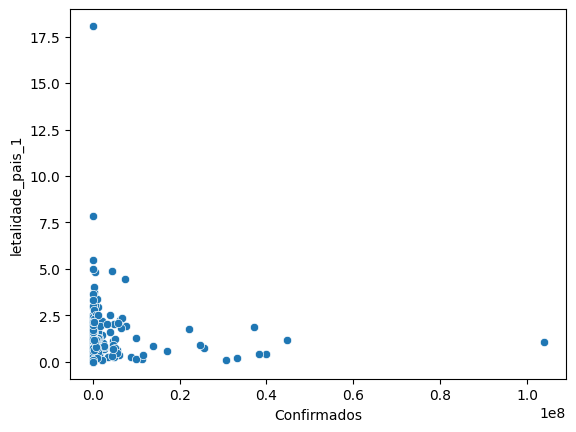

In [67]:
sns.scatterplot(data = combinados.query("Confirmados > 40"), x="Confirmados", y="letalidade_pais_1");

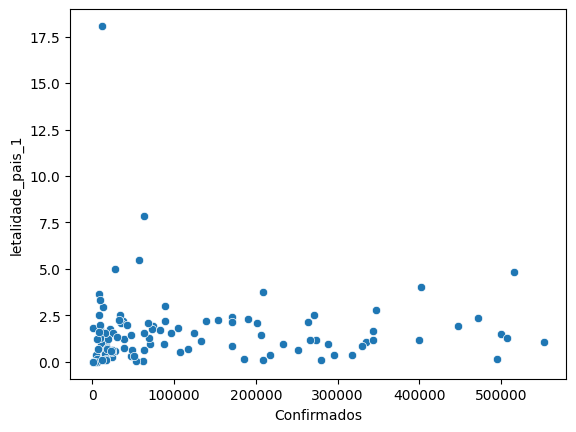

In [73]:
sns.scatterplot(data = combinados.query("Confirmados > 40 and Confirmados < 600000"), x="Confirmados", y="letalidade_pais_1");

In [ ]:
#24) - Projecção da Letalidade quando em relação aos dados dos confirmados

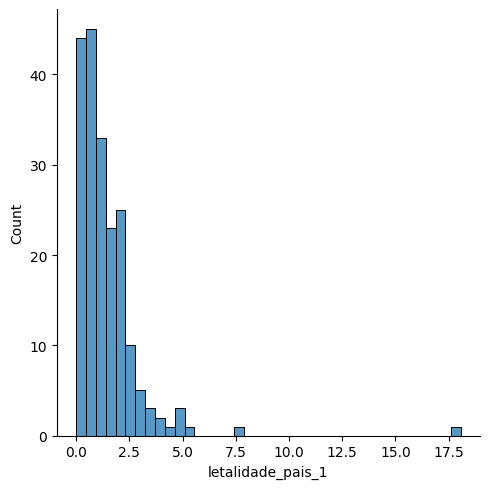

In [69]:
sns.displot(combinados.query("Confirmados > 40")["letalidade_pais_1"], kde=False);